In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
from pathlib import Path

In [3]:
os.chdir("../")

# Load Image

In [51]:
IMAGE_FILE = 'pi'

In [52]:
img = cv2.cvtColor(cv2.imread(f"artifacts/{IMAGE_FILE}.jpg"),cv2.COLOR_BGR2RGB)
img.shape

(1200, 1600, 3)

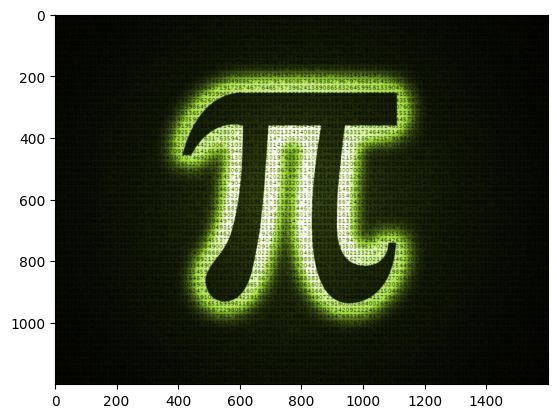

In [53]:
plt.imshow(img)

In [54]:
r,g,b = cv2.split(img)

In [55]:
r,g,b = r/255, g/255, b/255

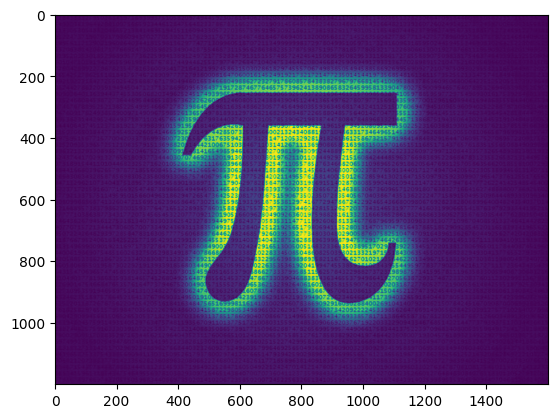

In [56]:
plt.imshow(r)

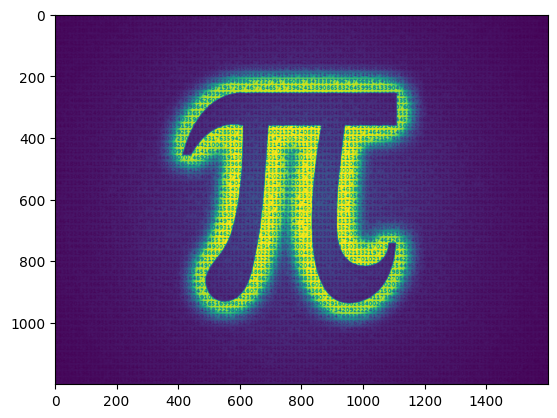

In [57]:
plt.imshow(g)

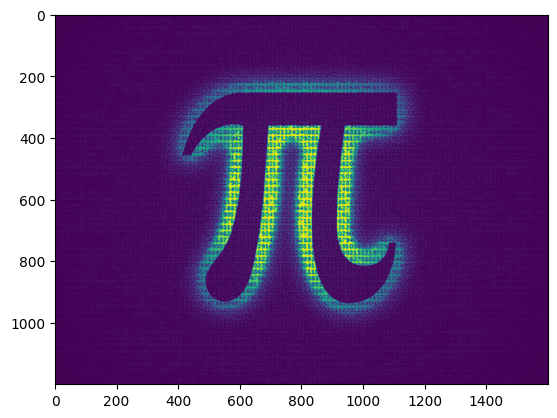

In [58]:
plt.imshow(b)

# PCA


In [59]:
pca_components = 50

In [60]:
pca_r = PCA(n_components=pca_components)
reduced_r = pca_r.fit_transform(r)

pca_g = PCA(n_components=pca_components)
reduced_g = pca_g.fit_transform(g)


pca_b = PCA(n_components=pca_components)
reduced_b = pca_b.fit_transform(b)

reduced_r.shape, reduced_g.shape, reduced_b.shape

((1200, 50), (1200, 50), (1200, 50))

In [61]:
combined = np.array([reduced_r,reduced_g,reduced_b])

## Decompress

In [62]:
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

In [63]:
reconstructed_r.shape, reconstructed_g.shape, reconstructed_b.shape

((1200, 1600), (1200, 1600), (1200, 1600))

## Plot Decompressed image

In [64]:
img_reconstructed = (cv2.merge((reconstructed_r,reconstructed_g,reconstructed_b)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


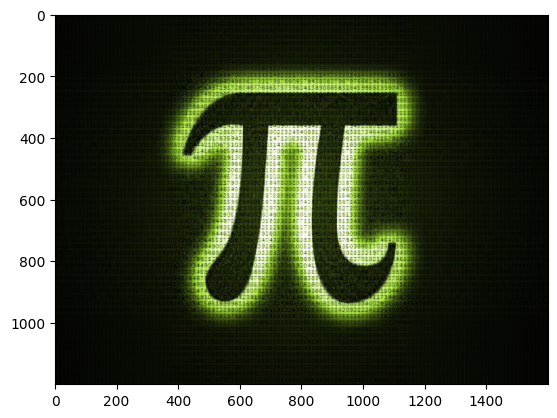

In [65]:
plt.imshow(img_reconstructed)